In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #seabornない人はpip installしてね
import os
from datetime import datetime

# カレントディレクトリを.pyと合わせるために以下を実行
from pathlib import Path
if Path.cwd().name == "notebook":
    os.chdir("..")


# 設定
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)
pd.set_option('display.max_columns', 500)
# 浮動小数点数を小数点以下3桁で表示するように設定
pd.set_option('display.float_format', '{:.3f}'.format)


In [47]:
# Mac Matplotlibのデフォルトフォントをヒラギノ角ゴシックに設定
plt.rcParams['font.family'] = 'Hiragino Sans'

In [ ]:
# Windows MatplotlibのデフォルトフォントをMeiryoに設定
plt.rcParams['font.family'] = 'Meiryo'

In [48]:
# CSVファイルを読み込む
file_path = 'data/input/gacha_history.csv'  # ファイルパスを適切に設定してください
df = pd.read_csv(file_path)

In [49]:
df.describe()

,id,user_uid,mission_type_id,add_ticket
count,1846907.000,1846907.000,1846907.000,1846907.000
mean,923455.459,54507.219,1.111,0.067
std,533157.869,35221.334,1.796,2.750
min,1.000,1.000,0.000,-300.000
25%,461727.500,16238.000,0.000,-1.000
50%,923454.000,60264.000,1.000,1.000
75%,1385182.500,88784.000,1.000,1.000
max,1846993.000,105518.000,14.000,300.000


In [16]:
df.columns

Index(['id', 'user_uid', 'mission_type_id', 'add_ticket',
       'mission_achievement_date', 'get_ticket_date', 'updated_at'],
      dtype='object')

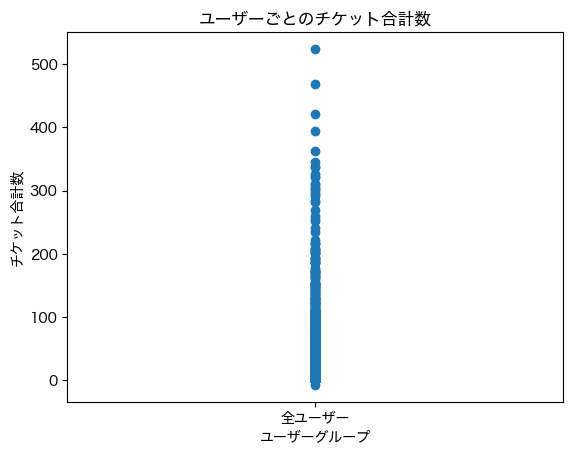

In [42]:
total_tickets_per_user = df.groupby(['user_uid'], observed=True)[
    'add_ticket'].sum()

# 散布図を描画するためのy座標のみを準備（x座標は必要ない）
y = total_tickets_per_user.values

# 散布図を描画（x座標は全て1として固定）
fig, ax = plt.subplots()
ax.scatter([1] * len(y), y)

ax.set_title('ユーザーごとのチケット合計数')
ax.set_xlabel('ユーザーグループ')
ax.set_ylabel('チケット合計数')

# x軸の目盛りを調整
ax.set_xticks([1])
ax.set_xticklabels(['全ユーザー'])

plt.show()


0 5


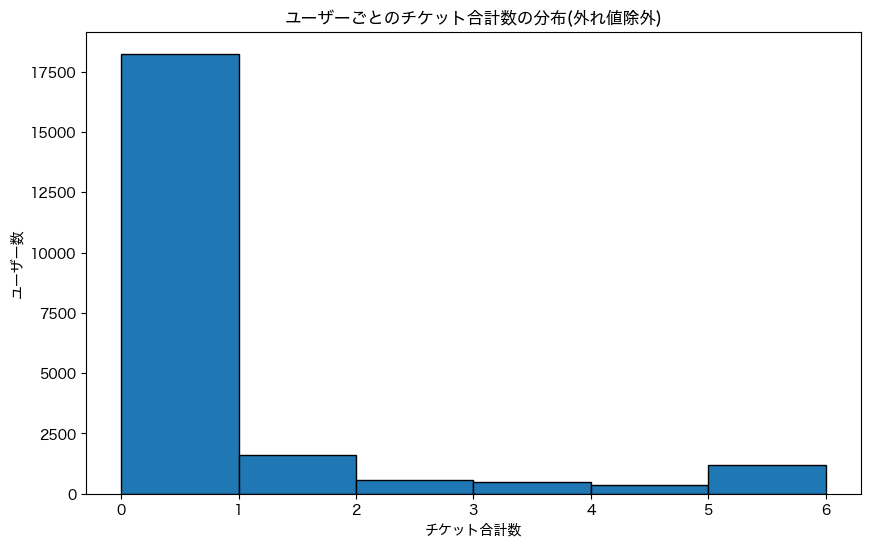

In [33]:
# 第一四分位数（Q1）と第三四分位数（Q3）を計算
Q1 = total_tickets_per_user.quantile(0.25)
Q3 = total_tickets_per_user.quantile(0.75)

# 四分位範囲（IQR）を計算
IQR = Q3 - Q1

# 外れ値の範囲を定義
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 外れ値を除外
filtered_data = total_tickets_per_user[(total_tickets_per_user >= lower_bound) & (total_tickets_per_user <= upper_bound)]

# ヒストグラムのビンの数を10分割に設定
bin_count = 6

# チケットの最小値と最大値を取得
min_tickets = min(filtered_data)
max_tickets = max(filtered_data)
print(min_tickets,max_tickets)

# ビンの幅を計算
# bin_width = (max_tickets - min_tickets) / bin_count
bin_width = 1

# ビンの範囲を設定
bins = [min_tickets + i * bin_width for i in range(bin_count + 1)]

# ヒストグラムを描画
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=bins, edgecolor='black')
plt.title('ユーザーごとのチケット合計数の分布(外れ値除外)')
plt.xlabel('チケット合計数')
plt.ylabel('ユーザー数')
# plt.xticks(range(min(total_tickets_per_user), max(total_tickets_per_user) + 1))
plt.show()

In [ ]:
# ミッション達成日時ごとの一人当たりの獲得チケット量
average_ticket_by_decade = data.groupby('mission_achievement_date', observed=True)['add_ticket'].mean()
print(average_ticket_by_decade)

# 棒グラフで表示
plt.bar(average_ticket_by_decade.index, average_ticket_by_decade)

mission_achievement_date
2023-03-23    1.000
2023-03-24    1.000
2023-03-25    1.000
2023-03-26    1.000
2023-03-27    1.000
2023-03-28    1.000
2023-03-29    1.000
2023-03-30    1.000
2023-03-31    0.815
2023-04-01    0.358
2023-04-02    0.300
2023-04-03    0.212
2023-04-04    0.133
2023-04-05    0.269
2023-04-06    0.179
2023-04-07    0.205
2023-04-08    0.321
2023-04-09    0.117
2023-04-10    0.094
2023-04-11    0.117
2023-04-12    0.075
2023-04-13    0.059
2023-04-14    0.076
2023-04-15   -0.027
2023-04-16    0.079
2023-04-17    0.071
2023-04-18    0.088
2023-04-19    0.028
2023-04-20    0.070
2023-04-21    0.026
2023-04-22    0.067
2023-04-23    0.057
2023-04-24    0.114
2023-04-25    0.057
2023-04-26   -0.044
2023-04-27    0.020
2023-04-28    0.070
2023-04-29    0.014
2023-04-30    0.042
2023-05-01    0.049
2023-05-02    0.030
2023-05-03    0.047
2023-05-04    0.029
2023-05-05    0.233
2023-05-06   -0.010
2023-05-07    0.029
2023-05-08    0.070
2023-05-09    0.046
2023-05-10    0

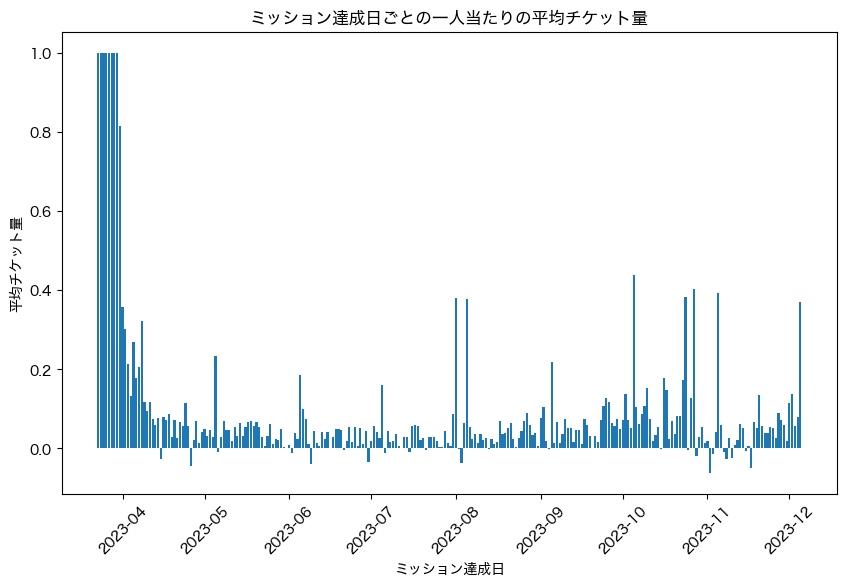

In [58]:
# ミッション達成日時のデータ型を確認し、日付型に変換
df['mission_achievement_date'] = pd.to_datetime(df['mission_achievement_date'])

# ミッション達成日ごとにグループ化して一人当たりの平均チケット量を計算
# 日時データから日付のみを抽出
df['mission_achievement_date'] = df['mission_achievement_date'].dt.date
# TODO: 2023/3/22のデータはそこまで多くなかったので、バグってます。修正してください。
df = df[df['mission_achievement_date'] != datetime(2023, 3, 22)] # この日がなぜか爆発的に多いため除外
average_ticket_by_date = df.groupby('mission_achievement_date')['add_ticket'].mean()
print(average_ticket_by_date)

# 棒グラフで表示
plt.figure(figsize=(10, 6))
plt.bar(average_ticket_by_date.index, average_ticket_by_date)
plt.title('ミッション達成日ごとの一人当たりの平均チケット量')
plt.xlabel('ミッション達成日')
plt.ylabel('平均チケット量')
plt.xticks(rotation=45)
plt.show()